<a href="https://colab.research.google.com/github/HenriqueHideaki/RepositorioInteligenciaArtificial/blob/main/Unidade%202/QUEST%C3%83O_06_UNIDADE2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

6-) Pesquise sobre redes neurais recorrentes LSTM. Apresente neste estudo aplicações das
LSTM deep learning. Seguem abaixo sugestões de aplicações.

i) Predição de series temporais (exemplo: predição de palavras no texto, ou predição de ações na bolsa de valores, etc.)

ii) Reconhecimento de voz

iii) Processamento de Linguagem Natural

iv) Outra aplicações de livre escolha

Para compreender essa arquitetura de redes neurais, devemos começar pelo tipo de dado que ela irá processar e gerar que são as sequências, sendo as mais comuns as: palavras, frases e enredos. Não precisamos nos limitar a isso, quando vemos uma cena em movimento, nosso cérebro antecipa o que vai acontecer de maneira que uma pausa ou um movimento reverso pode causar estranheza, em termos mais simples, podemos afirmar que exitem informações sequenciais por natureza, esses são os tipos de informações
ideais para entrada em uma Rede Neural Recorrente, suas aplicações mais comuns são no mercado de ações, taxa de juros ou exportações de um país. As redes neurais dessa arquitetura são capazes de "lembrar" de valores e informações através de loops que permite que as informações ou "pensamentos" tenham persistência. 
As redes neurais do tipo LSTM ou Long Short Term Memory, cuja tradução é memória de curto e longo prazo, são um dos exemplos dessa arquitetura, nela células e blocos de memória células ou blocos de memória da LSTM retêm e manipulam informações por meio de portões (gates). Eles, por sua vez, controlam a passagem de informações entre as células. Aliás, LSTMs possuem três tipos de portões: Forget Gate (portão dp esquecimento), Input Gate(portão de entrada), Output Gate(portão de saída).



1.   Forget Gate (portão de esquecimento): decide quais informações devem ser descartadas, ou seja, esquecidas pela célula de memória.

2.   Output Gate (portão de saída): extrai as informações úteis do estado da célula de memória atual, direcionando-as para a célula de memória seguinte.

3. Input Gate (portão de entrada): responsável por adicionar informações ao estado da célula de memória.



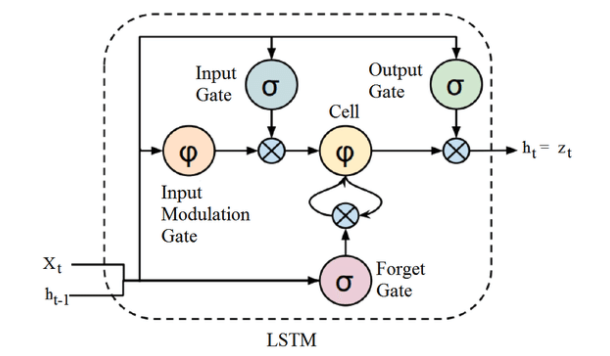

Esse portões utilizam funções matemáticas específicas para manipular a informação dentro da célula de acordo com sua tarefa como podemos ver na figura.
Além dos portões, a célula de memória de uma LSTM possui duas entradas, representadas por Xt e ht-1, onde:Xt representa a entrada no momento específico e ht-1 a saída da célula anterior.
A memória de longo prazo ou estado da célula possui conexão com todos os portões. A saída da célula, utilizada como input para a célula subsequente, é representada por Zt. A célula contém ainda um portão de modulação da entrada (input modulation gate), responsável por gerar um valor a partir da entrada atual e, também, da saída da célula anterior.





Uma aplicação da Rede Neural LSTM pode ser encontrada a seguir,nela a LSTM é utilizada para fazer uma sugestão de palavra, uma das tarefas mais basicas da área de Processamento de Linguagem Natural, neste exemplo é utilizado a ferramenta TensorFlow e Keras

## Referência:

[MakingPredictiveKeyboard](https://medium.com/@curiousily/making-a-predictive-keyboard-using-recurrent-neural-networks-tensorflow-for-hackers-part-v-3f238d824218)

In [ ]:
pip install numpy
pip install tensorflow
pip install keras
pip install nltk

In [ ]:
import numpy as np
from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers.core import Dense, Activation
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

Carregar o Dataset



In [ ]:
path = '1661-0.txt'
text = open(path).read().lower()
print('corpus length:', len(text))

corpus length: 581533


Dividir todo o conjunto de dados em cada palavra em ordem sem a presença de caracteres especiais.

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(text)

In [ ]:
unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

In [ ]:
WORD_LENGTH = 5
prev_words = []
next_words = []
for i in range(len(words) - WORD_LENGTH):
    prev_words.append(words[i:i + WORD_LENGTH])
    next_words.append(words[i + WORD_LENGTH])
print(prev_words[0])
print(next_words[0])

['the', 'project', 'gutenberg', 'ebook', 'of']
the


Dois arrays numpy X (para armazenar os recursos) e Y (para armazenar o rótulo correspondente (aqui, próxima palavra)). Iteramos X e Y se a palavra estiver presente, então a posição correspondente é 1.

In [ ]:
X = np.zeros((len(prev_words), WORD_LENGTH, len(unique_words)), dtype=bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)
for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        X[i, j, unique_word_index[each_word]] = 1
    Y[i, unique_word_index[next_words[i]]] = 1

In [ ]:
print(X[0][0])

[False False False ... False False False]


In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape=(WORD_LENGTH, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

Construindo o modelo

In [ ]:
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=2, shuffle=True).history

Epoch 1/2
811/811 [==============================] - 254s 310ms/step - loss: 5.8740 - accuracy: 0.1605 - val_loss: 8.0448 - val_accuracy: 0.1059
Epoch 2/2
811/811 [==============================] - 249s 307ms/step - loss: 5.6086 - accuracy: 0.1928 - val_loss: 8.0981 - val_accuracy: 0.1132


In [ ]:
model.save('keras_next_word_model.h5')
pickle.dump(history, open("history.p", "wb"))
model = load_model('keras_next_word_model.h5')
history = pickle.load(open("history.p", "rb"))

Agora, precisamos prever novas palavras usando este modelo. Para fazer isso, inserimos a amostra como um vetor de recursos. convertemos a string de entrada em um único vetor de recurso.

In [ ]:
def prepare_input(text):
    x = np.zeros((1, WORD_LENGTH, len(unique_words)))
    for t, word in enumerate(text.split()):
        print(word)
        x[0, t, unique_word_index[word]] = 1
    return x
prepare_input("It is not a lack".lower())

it
is
not
a
lack


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [ ]:
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)

    return heapq.nlargest(top_n, range(len(preds)), preds.take)

Função predict_completions que usa o modelo para prever e retornar a lista de n palavras previstas.

In [ ]:
def predict_completions(text, n=3):
    if text == "":
        return("0")
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [unique_words[idx] for idx in next_indices]

Agora vamos ver como ele prevê, usamos tokenizer.tokenize para remover as pontuações e também escolhemos 5 primeiras palavras porque nossas previsões se baseiam em 5 palavras anteriores.

In [ ]:
q =  "Your life will never be the same again"
print("correct sentence: ",q)
seq = " ".join(tokenizer.tokenize(q.lower())[0:5])
print("Sequence: ",seq)
print("next possible words: ", predict_completions(seq, 5))

correct sentence:  Your life will never be the same again
Sequence:  your life will never be
your
life
will
never
be
next possible words:  ['swash', 'swamp', 'arduous', 'confining', 'forbidden']
